In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('credit-card-default.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df['defaulted'].value_counts()

0    23364
1     6636
Name: defaulted, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('defaulted',axis=1)
y = df['defaulted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((21000, 24), (9000, 24), (21000,), (9000,))

In [11]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [12]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
predictions = rfc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6927
           1       0.68      0.38      0.48      2073

    accuracy                           0.81      9000
   macro avg       0.76      0.66      0.69      9000
weighted avg       0.80      0.81      0.79      9000



In [16]:
print(confusion_matrix(y_test,predictions))

[[6552  375]
 [1293  780]]


In [17]:
print(accuracy_score(y_test,predictions))

0.8146666666666667


# Hyper Parameter Tuning

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_depth':range(2,20,5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [29]:
#scores = rf.cv_results_
scores = pd.DataFrame(scores)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.583437,0.007020,0.023541,0.000493,2,{'max_depth': 2},0.805476,0.798810,0.803571,0.804048,0.804048,0.803190,0.002282,4,0.802202,0.803095,0.801548,0.806250,0.803036,0.803226,0.001616
1,1.455509,0.026341,0.035298,0.001856,7,{'max_depth': 7},0.821905,0.816905,0.824762,0.819048,0.819048,0.820333,0.002726,2,0.836607,0.837143,0.836190,0.838393,0.838631,0.837393,0.000965
2,2.201313,0.011672,0.050468,0.000485,12,{'max_depth': 12},0.821667,0.818095,0.824524,0.820714,0.816905,0.820381,0.002692,1,0.887500,0.885179,0.887381,0.887202,0.890476,0.887548,0.001693
3,2.801909,0.031868,0.064828,0.005045,17,{'max_depth': 17},0.822619,0.816667,0.824286,0.817619,0.818095,0.819857,0.003018,3,0.929107,0.929167,0.929524,0.929464,0.930655,0.929583,0.000560


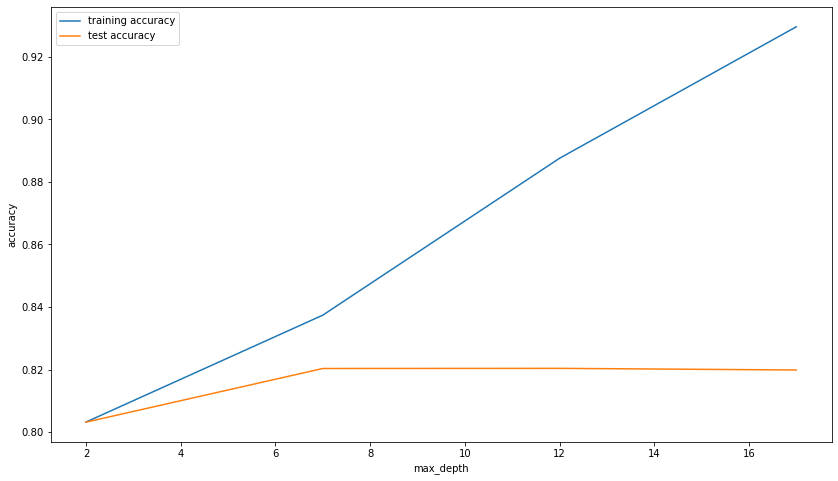

In [30]:
plt.figure(figsize=(14,8))
plt.plot(scores['param_max_depth'],scores['mean_train_score'],label='training accuracy')
plt.plot(scores['param_max_depth'],scores['mean_test_score'],label='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'n_estimators':range(100,1500,400)}

rf = RandomForestClassifier(max_depth=4)

rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [35]:
scores = rf.cv_results_
scores = pd.DataFrame(scores)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.948066,0.020288,0.028122,0.000401,100,{'n_estimators': 100},0.813810,0.811667,0.812619,0.811667,0.810476,0.812048,0.001113,4,0.815893,0.816310,0.813095,0.815655,0.813512,0.814893,0.001321
1,4.713604,0.078911,0.131641,0.002281,500,{'n_estimators': 500},0.814286,0.810714,0.815238,0.810238,0.815476,0.813190,0.002257,3,0.814167,0.815298,0.814048,0.815893,0.814940,0.814869,0.000694
2,8.473346,0.127740,0.237764,0.004661,900,{'n_estimators': 900},0.814762,0.810714,0.815714,0.810714,0.815238,0.813429,0.002237,1,0.814524,0.815595,0.815179,0.815298,0.814583,0.815036,0.000417
3,12.413810,0.100259,0.343483,0.005935,1300,{'n_estimators': 1300},0.814048,0.811190,0.815000,0.810714,0.815238,0.813238,0.001914,2,0.814167,0.815179,0.814524,0.815179,0.814345,0.814679,0.000424


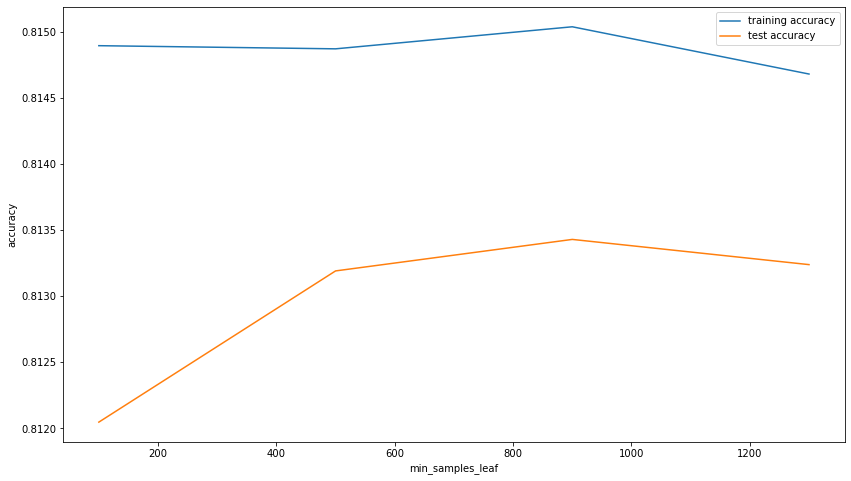

In [37]:
plt.figure(figsize=(14,8))
plt.plot(scores['param_n_estimators'],scores['mean_train_score'],label='training accuracy')
plt.plot(scores['param_n_estimators'],scores['mean_test_score'],label='test accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'max_features':[4,8,14,20,24]}

rf = RandomForestClassifier(max_depth=4)

rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [39]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.953652,0.012191,0.028926,0.000892,4,{'max_features': 4},0.814524,0.811905,0.815000,0.811429,0.813810,0.813333,0.001421,5,0.814702,0.815179,0.813750,0.816071,0.814464,0.814833,0.000772
1,1.674124,0.017813,0.028125,0.000399,8,{'max_features': 8},0.822381,0.819524,0.829524,0.821667,0.818333,0.822286,0.003900,1,0.825179,0.826369,0.823452,0.825536,0.825179,0.825143,0.000951
2,2.720726,0.019717,0.027329,0.000491,14,{'max_features': 14},0.822381,0.818333,0.826905,0.820714,0.817857,0.821238,0.003273,4,0.824643,0.826071,0.822857,0.824702,0.825774,0.824810,0.001129
3,3.757554,0.047188,0.027731,0.000742,20,{'max_features': 20},0.822143,0.819048,0.827143,0.820476,0.819524,0.821667,0.002935,3,0.824762,0.826190,0.823810,0.825357,0.824881,0.825000,0.000779
4,4.518121,0.017244,0.027726,0.000977,24,{'max_features': 24},0.822143,0.818810,0.826905,0.821429,0.820238,0.821905,0.002744,2,0.824940,0.826964,0.824524,0.825774,0.825179,0.825476,0.000847


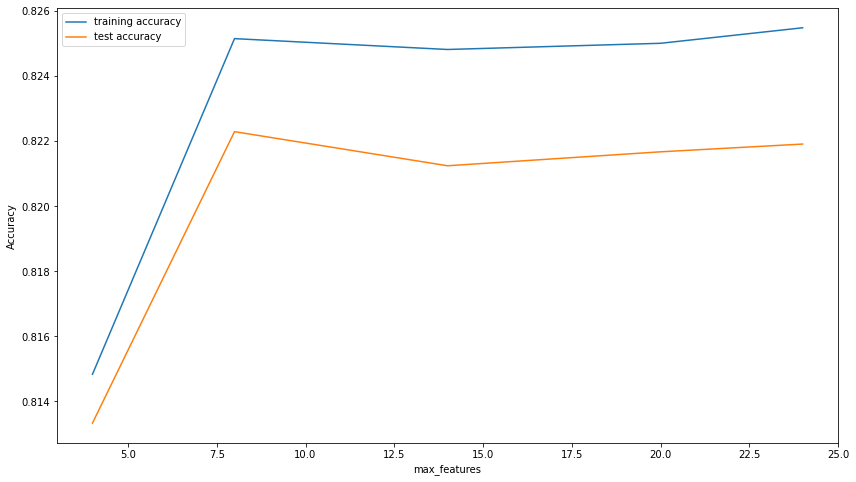

In [40]:
plt.figure(figsize=(14,8))
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_leaf':range(100,400,50)}

rf = RandomForestClassifier(max_depth=4)

rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [42]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.954439,0.013733,0.027726,0.000399,100,{'min_samples_leaf': 100},0.813095,0.809762,0.814048,0.809286,0.814048,0.812048,0.002095,1,0.813333,0.814107,0.812500,0.813929,0.814702,0.813714,0.000748
1,0.932707,0.022296,0.028324,0.000798,150,{'min_samples_leaf': 150},0.812619,0.809524,0.813571,0.808571,0.811667,0.811190,0.001875,2,0.812917,0.812321,0.812500,0.812679,0.813393,0.812762,0.000372
2,0.912770,0.010063,0.028114,0.000393,200,{'min_samples_leaf': 200},0.813571,0.809762,0.814048,0.809524,0.808333,0.811048,0.002311,3,0.813393,0.812976,0.811250,0.814821,0.810060,0.812500,0.001669
3,0.892810,0.004614,0.028529,0.000793,250,{'min_samples_leaf': 250},0.812857,0.811190,0.811429,0.807619,0.807619,0.810143,0.002138,4,0.811667,0.812917,0.810417,0.809524,0.808274,0.810560,0.001619
4,0.905180,0.013971,0.028723,0.000399,300,{'min_samples_leaf': 300},0.812619,0.804524,0.813571,0.806190,0.810000,0.809381,0.003527,5,0.811131,0.808214,0.811369,0.809940,0.810476,0.810226,0.001124


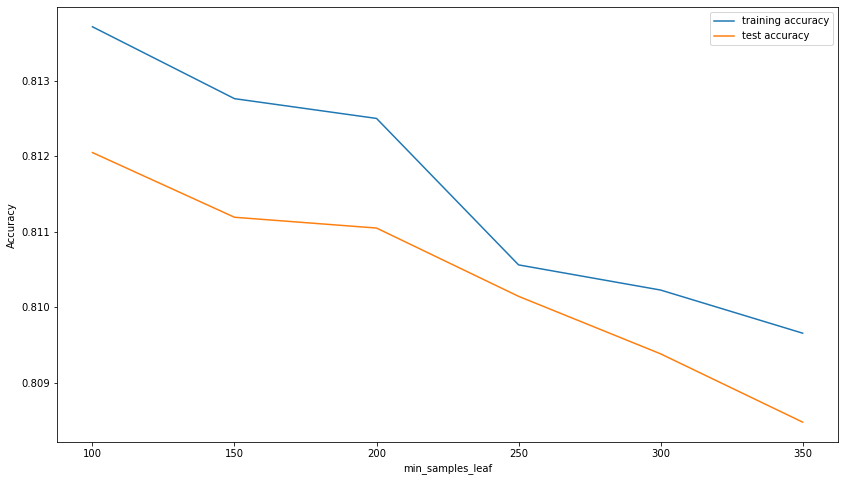

In [43]:
plt.figure(figsize=(14,8))
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5

parameters = {'min_samples_split':range(200,500,50)}

rf = RandomForestClassifier(max_depth=4)

rf = GridSearchCV(rf,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)

rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [45]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.952454,0.007109,0.028723,0.000399,200,{'min_samples_split': 200},0.814524,0.810952,0.815952,0.811429,0.815238,0.813619,0.002039,1,0.813393,0.814286,0.814762,0.816429,0.814702,0.814714,0.000987
1,0.955844,0.019792,0.028330,0.000496,250,{'min_samples_split': 250},0.815952,0.812619,0.816190,0.810952,0.812381,0.813619,0.002083,1,0.814107,0.815357,0.814940,0.815298,0.813452,0.814631,0.000739
2,0.931703,0.018122,0.028723,0.000747,300,{'min_samples_split': 300},0.813333,0.809762,0.814762,0.809048,0.810714,0.811524,0.002175,6,0.812440,0.814226,0.813452,0.813631,0.812500,0.813250,0.000687
3,0.942076,0.008829,0.028531,0.000494,350,{'min_samples_split': 350},0.811905,0.811667,0.814048,0.810000,0.812619,0.812048,0.001318,5,0.812143,0.813750,0.812560,0.815595,0.812917,0.813393,0.001222
4,0.951855,0.019427,0.028928,0.002519,400,{'min_samples_split': 400},0.814286,0.810000,0.815000,0.810000,0.812857,0.812429,0.002100,4,0.814643,0.811548,0.812679,0.815238,0.812798,0.813381,0.001359


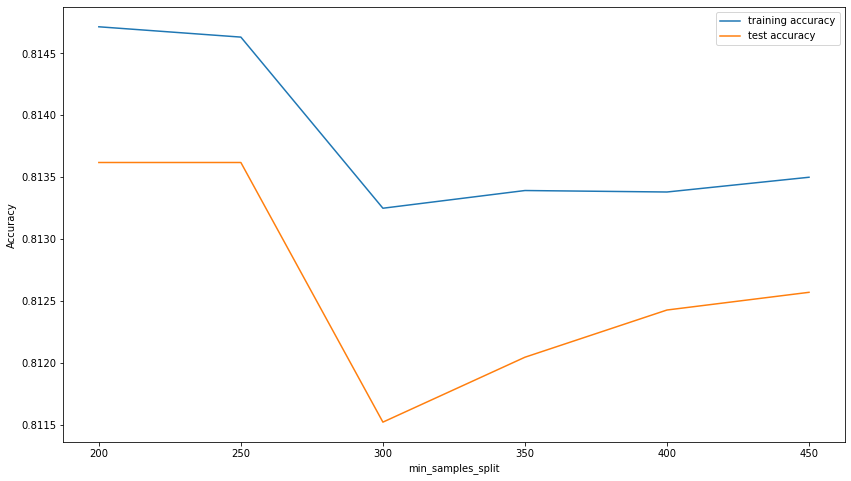

In [46]:
plt.figure(figsize=(14,8))
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [47]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 150, 100),
    'min_samples_split': range(200, 250, 50),
    'n_estimators': [100,1000, 300], 
    'max_features': [5,10,15,20]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [48]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  4.0min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10],
                         'max_features': [5, 10, 15, 20],
                         'min_samples_leaf': range(100, 150, 100),
                         'min_samples_split': range(200, 250, 50),
                         'n_estimators': [100, 1000, 300]},
             verbose=1)

In [50]:
grid_search.best_score_
grid_search.best_params_

{'max_depth': 8,
 'max_features': 10,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 300}

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,max_depth=8,min_samples_leaf=100,min_samples_split=200,max_features=10,n_estimators=300)


In [52]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_features=10, min_samples_leaf=100,
                       min_samples_split=200, n_estimators=300)

In [53]:
predictions = rfc.predict(X_test)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6927
           1       0.70      0.36      0.48      2073

    accuracy                           0.82      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.80      0.82      0.79      9000



In [57]:
print(confusion_matrix(y_test,predictions))

[[6602  325]
 [1317  756]]


In [59]:
print(accuracy_score(y_test,predictions))

0.8175555555555556
